In [104]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# Create database and table, and insert sample data
def create_database():
    conn = sqlite3.connect("sales_data.db")
    cursor = conn.cursor()
    
    # Create table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            product TEXT,
            quantity INTEGER,
            price REAL
        )
    """)
    
    # Insert sample data
    sales_data = [
        ("Product A", 10, 15.0),
        ("Product B", 5, 25.0),
        ("Product A", 7, 15.0),
        ("Product C", 3, 30.0),
        ("Product B", 8, 25.0),
    ]
    
    cursor.executemany(
        "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
        sales_data
    )
    
    conn.commit()
    conn.close()
print("Database created and sample data inserted successfully!")

Database created and sample data inserted successfully!



Sales Summary:

      product  total_qty  revenue
0  Pproduct C          6    180.0
1   Product A         85   1275.0
2   Product B         65   1625.0
3   Product C          9    270.0


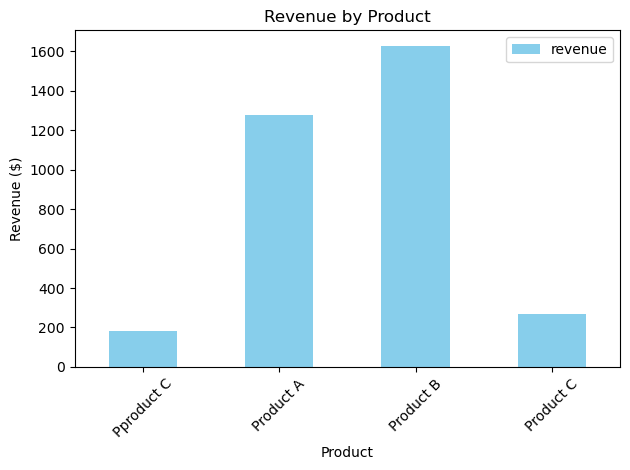

<Figure size 640x480 with 0 Axes>

In [134]:
#Query the database and calculate total quantity and revenue
def query_data():
    conn = sqlite3.connect("sales_data.db")
    
    query = """
        SELECT
            product,
            SUM(quantity) AS total_qty,
            SUM(quantity * price) AS revenue
        FROM
            sales
        GROUP BY
            product
    """
    
    df = pd.read_sql_query(query, conn)
    conn.close()
    
    print("\nSales Summary:\n")
    print(df)
    
    return df

# Visualize the revenue data using a bar chart
def plot_data(df):
    df.plot(kind='bar', x='product', y='revenue', color='skyblue')
    plt.title("Revenue by Product")
    plt.xlabel("Product")
    plt.ylabel("Revenue ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Optionally, save the plot as an image file
    plt.savefig("sales_chart.png")

# Main script execution
if __name__ == "__main__":
    create_database()
    df = query_data()
    plot_data(df)